

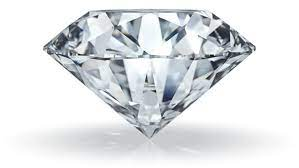


# Diamonds

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

%matplotlib inline

In [2]:
#load the dataset
data=pd.read_csv(r'C:\Users\נעמיה\diamonds.csv')
#get information about the data features, the amount of instances and the amount of Nan values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [3]:
#first look
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


 As you can see the column "Unnamed: 0" is an unnecessary index column. We will now delete it from the data.

In [4]:
data=data.drop(columns='Unnamed: 0')

We will now apply the "describe()" function to get a general impression of the number ranges in each feature in the data.

In [5]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


You can see that there are '0' values in the 'x', 'y', 'z' features. These values are invalid so I will delete them.

In [6]:
data = data.drop(data.loc[data.x == 0].index)
data = data.drop(data.loc[data.y == 0].index)
data = data.drop(data.loc[data.z == 0].index)

In [7]:
#apply 'Describe()' again for information about valid values.
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


 Let's see what field diamonds are in according "x, y, z" features.

Text(0.5, 0, 'Z Label')

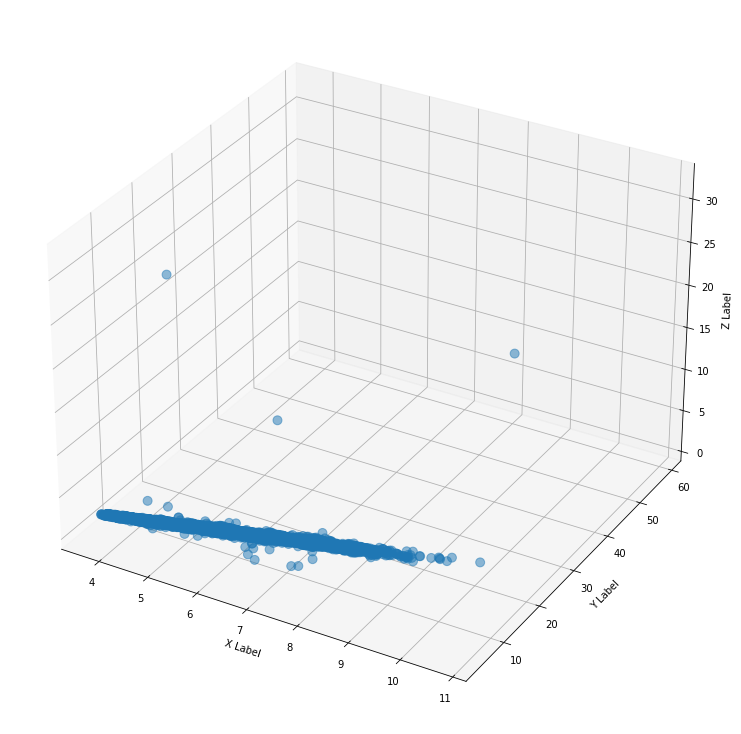

In [8]:
fig = plt.figure(figsize=(16,10))
ax = Axes3D(fig)

# plot 3D
ax.scatter(xs=data['x'], ys=data['y'], zs=data['z'], s=80, alpha=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


As you can see, there are 3 cases of abnormalities much larger than average, out of tens of thousands of normal cases. In order not to damage the model exactly - we will delete them.

In [9]:
data = data.drop(data.loc[data.y > 35].index)
data = data.drop(data.loc[data.z > 25].index)

We will add a feature to the dataset that represents the volume of the diamond - x * y * z

In [10]:
data['volume']=data['x']*data['y']*data['z']
data

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


Let's look at the relationship between volume and price and carat.

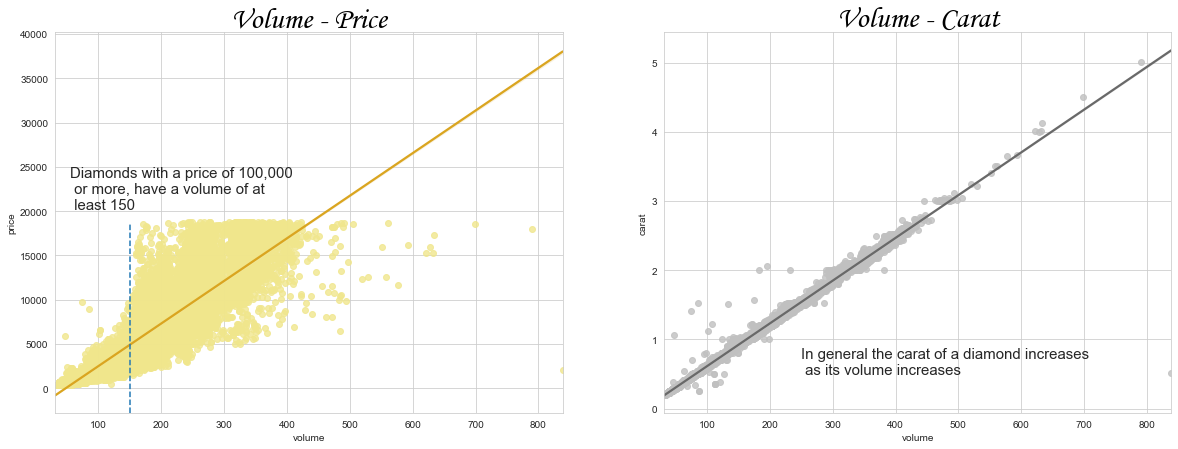

In [21]:
# with sns.axes_style('dark'):
f, axes = plt.subplots(1, 2, figsize=(20, 7), sharex=False)
# sns.set(rc={'figure.figsize':(10,5)})

sns.regplot(x="volume", y="price", data=data,ax=axes[0], fit_reg=True, scatter_kws={"color": "khaki"}, line_kws={"color": "goldenrod"})
sns.regplot(x="volume", y="carat", data=data,ax=axes[1], fit_reg=True, scatter_kws={"color": "silver"}, line_kws={"color": "dimgray"})
axes[1].set_title('Volume - Carat',fontdict={'fontsize': 30,'fontweight':20,'color':'black','fontfamily':'Monotype Corsiva'})
axes[0].set_title('Volume - Price',fontdict={'fontsize': 30,'fontweight':20,'color':'black','fontfamily':'Monotype Corsiva'})
axes[1].text(250,0.5, "In general the carat of a diamond increases\n as its volume increases",size=15)
axes[0].text(55,20200, "Diamonds with a price of 100,000\n or more, have a volume of at\n least 150",size=15)
axes[0].axvline(150, ls='--',ymax=0.5)


Does the different categories have an effect on the price of the diamond?

<AxesSubplot:xlabel='color', ylabel='price'>

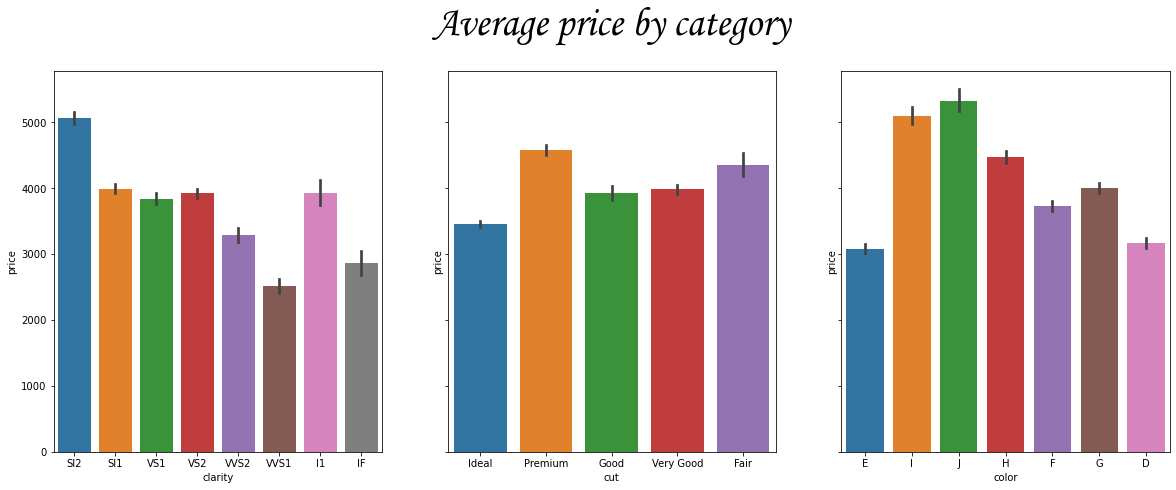

In [12]:
f, axes = plt.subplots(1, 3, figsize=(20, 7), sharex=False,sharey=True)
sns.barplot(x="clarity",y="price", data=data,ax=axes[ 0])

g=sns.barplot(x="cut",y="price", data=data,ax=axes[ 1])
axes[1].set_title('Average price by category',y=1.08,fontdict={'fontsize': 40,'fontweight':20,'color':'black','fontfamily':'Monotype Corsiva'})

sns.barplot(x="color",y="price", data=data,ax=axes[ 2])


Seemingly categories have no effect on price. There are categories of the lowest level whose average price exceeds the average price of the categories at the high level.

We will split the dataset to 3 different parts. The 'top' data contains the diamonds at the high level of color, cut and clarity. The 'mid' data contains the medium level diamonds, and the 'low' data contains the lower level diamonds.We will check the price-volume ratio in each data.

Text(0.5, 1.0, 'Low: Price - Volume')

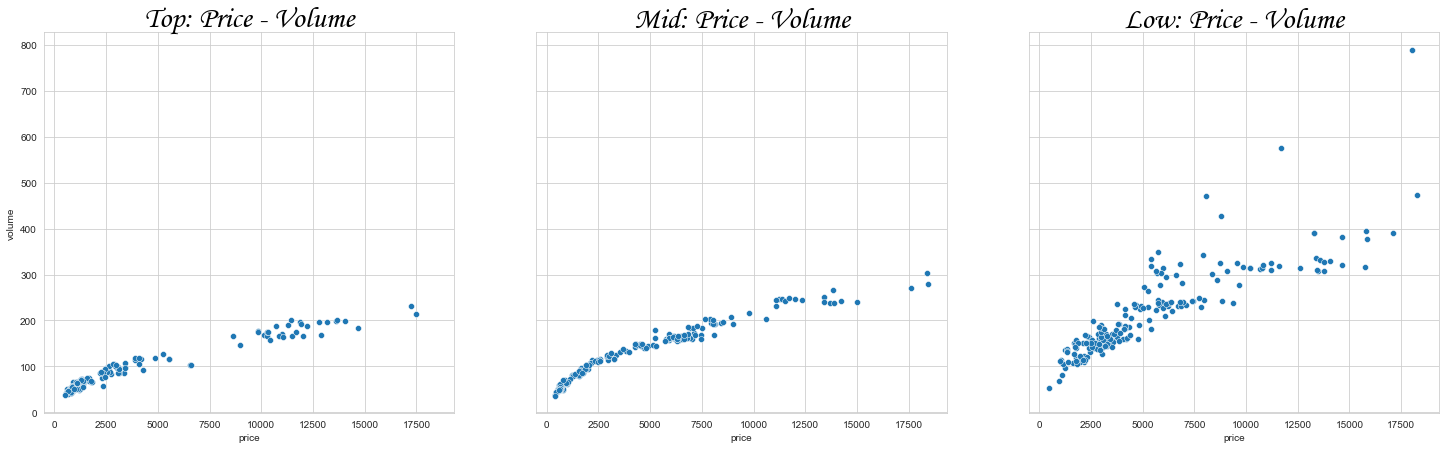

In [13]:
top=data[(data['color'].isin(['D','E']))& (data['cut'].isin(['Ideal','Premium']))& (data['clarity'].isin(['IF','VVS1','VVS2']))]
mid=data[(data['color'].isin(['F','G']))& (data['cut'].isin(['Good','Very Good']))& (data['clarity'].isin(['VS1','VS2']))]
low=data[(data['color'].isin(['H','I','J']))& (data['cut'].isin(['Fair']))& (data['clarity'].isin(['SI1','SI2','I1']))]


# take a sample of 200 diamonds from each data.
sns.set_style(style='whitegrid')
t=top.sample(n=200)
m=mid.sample(n=200)
l=low.sample(n=200)

#plot each data
f, axes = plt.subplots(1, 3, figsize=(25, 7), sharey=True,sharex=True)
ax = sns.scatterplot(x=t['price'], y=t['volume'],ax=axes[0])
axes[0].set_title('Top: Price - Volume',fontdict={'fontsize': 30,'fontweight':20,'color':'black','fontfamily':'Monotype Corsiva'})
ax = sns.scatterplot(x=m['price'],y=m['volume'],ax=axes[1])
axes[1].set_title('Mid: Price - Volume',fontdict={'fontsize': 30,'fontweight':20,'color':'black','fontfamily':'Monotype Corsiva'})
ax = sns.scatterplot(x=l['price'],y=l['volume'],ax=axes[2])
axes[2].set_title('Low: Price - Volume',fontdict={'fontsize': 30,'fontweight':20,'color':'black','fontfamily':'Monotype Corsiva'})

It can be seen that the expensive diamonds in 'low' have a very large volume, compared to the 'top' diamonds.

We will therefore change the values of the categorical features to numeric values according to their quality, so that the model will be affected by these characteristics.

In [14]:
#replace the cut category with numbers 1-5
new_cut = {'Fair':1,'Good':2,'Very Good':3, 'Premium':4,'Ideal':5}
data['cut'] = data['cut'].map(new_cut);

#replace the color category with numbers 1-7
new_color = {'J':1,'I':2, 'H':3,'G':4,'F':5,'E':6,'D':7}
data['color'] = data['color'].map(new_color);

#replace the clarity category with numbers 1-8
new_clarity = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
data['clarity'] = data['clarity'].map(new_clarity);

We will now present a heatmap that illustrates the correlation between the features.

<AxesSubplot:>

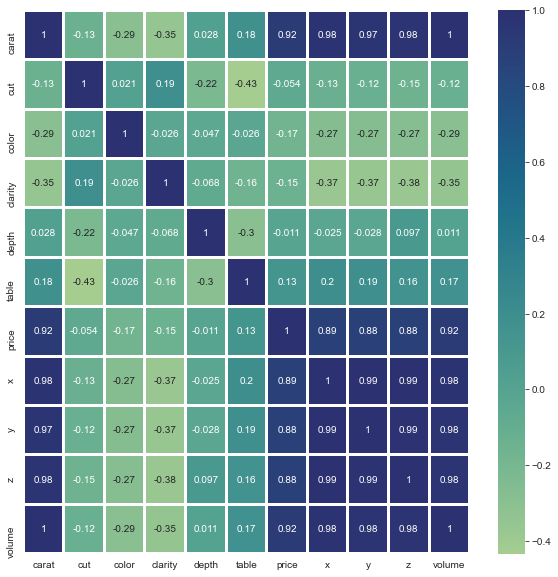

In [15]:
correlation= data.corr()#calculate correlation of features
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,cmap="crest",annot=True,linewidths=2)#show the correlation on map.

## Model

 put the data into the 'X' without the price feature ("target"). And the price feature put into 'y'


In [16]:
X = data.drop(['price'],axis=1)
y = data['price']

Split X and y into two parts - train and test.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1) #the 'test' size is 10% of all instances in dataset

We will now look at the "dummy regressor" model. This is a stupid model that predicts the target by the median. The output of this model can be compared to the output of a "linear regression" model, thus evaluating the usefulness of the model.

In [18]:
dummy_regr = DummyRegressor(strategy="median")
# fit the model
dummy_regr.fit(X_train, y_train)
# פredict the prices of X_test
dum_y_pred=dummy_regr.predict(X_test)


print('Dummy regression accuracy: ')

mse = mean_squared_error(y_test, dum_y_pred)
rmse = mean_squared_error(y_test, dum_y_pred)**0.5
mae = mean_absolute_error(y_test, dum_y_pred)
r2 = r2_score(y_test, dum_y_pred)
cross = cross_val_score(estimator = dummy_regr, X = X_train, y = y_train, cv = 5)

print('Cross val     : ',cross)
print('R2            : ', r2)
print('MAE           : ', mae)
print('MSE (RMSE)    : ', mse,' (',rmse,')')


Dummy regression accuracy: 
Cross val     :  [-0.15838513 -0.14692415 -0.14663197 -0.13916087 -0.14352322]
R2            :  -0.1569563607357216
MAE           :  2875.2518545994067
MSE (RMSE)    :  19147180.454376854  ( 4375.749130649157 )


In [19]:
reg = LinearRegression()
reg.fit(X_train, y_train)
lin_y_pred=reg.predict(X_test)
reg.score(X_test, y_test)

print('Linear regression accuracy: ')
cross = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 4,verbose = 0)
mse = mean_squared_error(y_test, lin_y_pred)
rmse = mean_squared_error(y_test, lin_y_pred)**0.5
mae = mean_absolute_error(y_test, lin_y_pred)
r2 = r2_score(y_test, lin_y_pred)

print('Cross val     : ',cross)
print('R2            : ', r2)
print('MAE           : ', mae)
print('MSE (RMSE)    : ', mse,' (',rmse,')')

Linear regression accuracy: 
Cross val     :  [0.8633876  0.91296509 0.9061687  0.90460386]
R2            :  0.9136895893827639
MAE           :  789.0082973245535
MSE (RMSE)    :  1428403.925389783  ( 1195.1585356720602 )


In [300]:
df=data[data['color']=='D'][data['cut']=='Ideal'][data['clarity']=='VVS2']

<ipython-input-300-d1242e7d6738>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=data[data['color']=='D'][data['cut']=='Ideal'][data['clarity']=='VVS2']


<AxesSubplot:xlabel='carat', ylabel='price'>

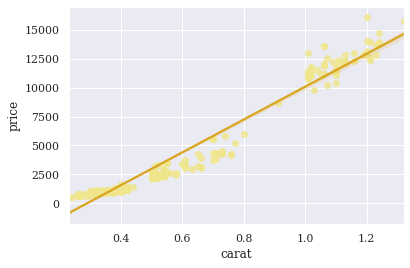

In [301]:
sns.regplot(x="carat", y="price", data=df, fit_reg=True, scatter_kws={"color": "khaki"}, line_kws={"color": "goldenrod"})


In [464]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, x))

3020.5058390529985


In [157]:
X_test

,carat,cut,color,clarity,depth,table,x,y,z,volume
19143,1.60,2,1,1,62.2,59.0,7.42,7.46,4.63,256.285316
11001,1.22,4,2,3,61.9,55.0,6.88,6.83,4.24,199.239296
49583,0.65,3,6,2,60.5,58.0,5.61,5.57,3.38,105.617226
53746,0.71,2,6,2,61.1,56.0,5.74,5.78,3.52,116.783744
34739,0.32,4,4,4,62.0,54.0,4.44,4.43,2.75,54.090300
...,...,...,...,...,...,...,...,...,...,...
49482,0.55,4,3,6,62.6,56.0,5.24,5.27,3.29,90.852692
8513,1.01,2,4,1,60.0,55.0,6.56,6.53,3.93,168.348624
40715,0.59,2,2,1,60.3,56.0,5.43,5.48,3.29,97.898556
26904,2.26,4,1,2,62.4,57.0,8.43,8.37,5.24,369.729684


<AxesSubplot:xlabel='price', ylabel='Density'>

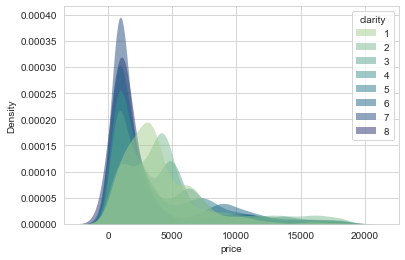

In [25]:
sns.kdeplot(
   data=data, x="price", hue="clarity",
   fill=True, common_norm=False, palette="crest",
   alpha=0.5, linewidth=0,
)